In [1]:
import math
M_sun=1.9891*(10**30)
M=45*M_sun  ## Mass of our star
R_sun=696340*1000
R=math.sqrt(M/M_sun)*R_sun
R_earth=6371*1000
## sqrt(60)*R_sun is the maximum radius we are taking to consideration correspondiing to 750 pixels in radius

R_pixels=int(750*R/(math.sqrt(60)*R_sun))  ## Radius in pixels of our star

## Jupiter like planet

Rp = R/10
Rp_pixels=int(750*Rp/(math.sqrt(60)*R_sun))
Mp= M/1000

AU=1.496*(10**11)
d= 2.2*AU

i=89.2*math.pi/180
h=d*math.cos(i)
h_pixel=int(h*750/(math.sqrt(60)*R_sun))

G = 6.6743*(10**(-11))

T= math.sqrt(4*(math.pi**2)*(d**3)/(G*M))

v=math.sqrt(G*M/d)

dt=Rp_pixels*math.sqrt(60)*R_sun/(750*v)
d_pixel=int(d*750/(math.sqrt(60)*R_sun))

transit_time=((2048-2*Rp_pixels)/(math.pi*d_pixel))*(T/2)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

x = np.arange(-1024, 1024, 1)
y = np.arange(-1024, 1024, 1)

[X, Y] = np.meshgrid(x, y)  # initializing a 2d mesh grid in which the transit simulation will take place
f=np.zeros((len(X),len(Y)))

u = 0.7  # limb darkening coeffecient
I_0 = 1000   # intensity of the background star
#R = np.linspace(0,500,100)
def limb_dark(r): # r is the height of a point on the 2d projected surface of the star from its centre
    I_r = I_0 * (1-(u*(1-np.sqrt((R_pixels**2 - r**2)/R_pixels**2))))
    return I_r
for i in x: # defininng the star as a circle on the 2d plane and also using limb-darkening
    for j in y:
      if i**2+j**2 <= R_pixels**2:
         f[i+1024][j+1024] =  limb_dark(np.sqrt(i**2+j**2))
      else:
         f[i+1024][j+1024] = 0


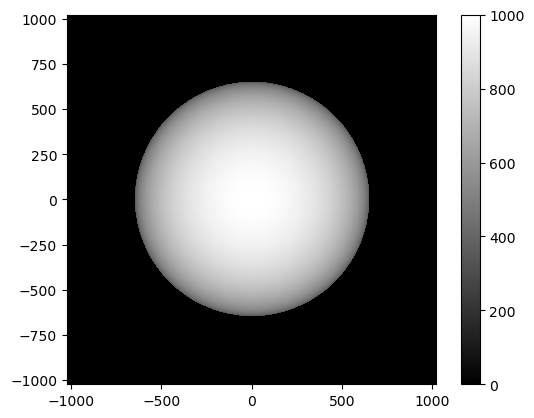

In [3]:
plt.imshow(f, cmap ='gray', extent =[X.min(), X.max(), Y.min(), Y.max()], interpolation ='nearest', origin ='lower')
plt.colorbar()

In [4]:
X=1024*math.sqrt(60)*R_sun/750

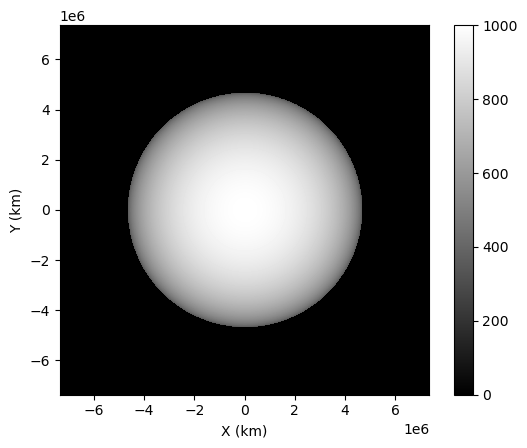

Text(0.5, 0, 'Time (hours)')

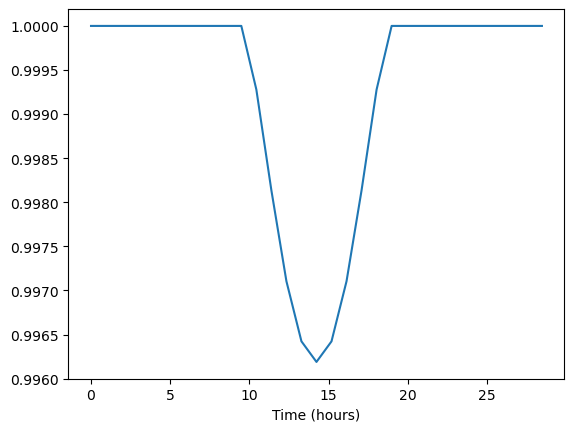

In [5]:
from IPython.display import clear_output
c=[0,h_pixel]
T=[]
I=[]
for t in np.arange(0,transit_time,dt):
    clear_output(wait=True)
    c=[int(v*t*750/(math.sqrt(60)*R_sun))+Rp_pixels,h_pixel]
    #if c[1]+1024+Rp_pixels>=2048 or c[0]+Rp_pixels>=2024:
    #    break
    g=f.copy()

    for i in range(-Rp_pixels,Rp_pixels):
        for j in range(-Rp_pixels,Rp_pixels):
            if i**2+j**2<=Rp_pixels**2:
                g[c[0]+i][c[1]+1024+j]=0
    plt.imshow(g.T, cmap ='gray', extent =[-X/1000, X/1000, -X/1000, X/1000], interpolation ='nearest', origin ='lower')
    plt.xlabel("X (km)")
    plt.ylabel("Y (km)")
    plt.colorbar()
    I.append(np.sum(g))
    T.append(t)
    #plt.plot(T,I)
    plt.pause(0.00000000001)
I=I/max(I)
T=[i/(60*60) for i in T]
plt.plot(T,I)
plt.xlabel("Time (hours)")


# **Varying the inclination parameter (i)**

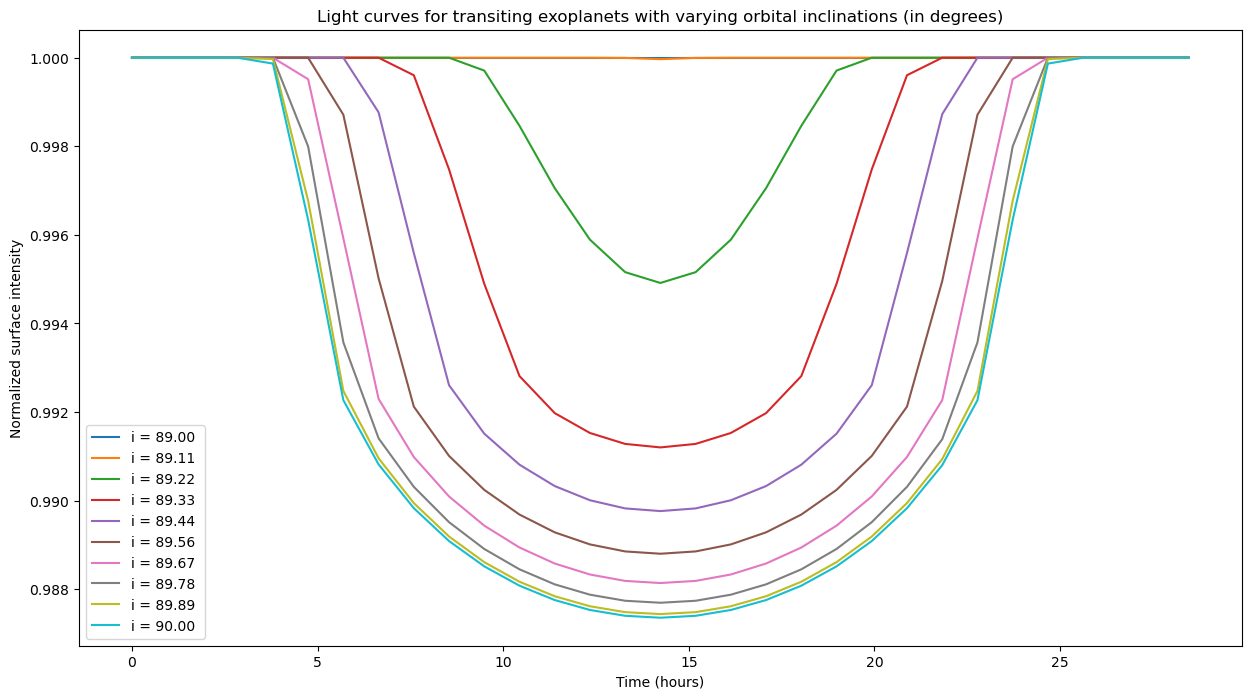

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

deg_array = np.linspace(89,90,10)
i_array = deg_array*math.pi/180

M_sun=1.9891*(10**30)
M=45*M_sun  ## Mass of our star
R_sun=696340*1000
R=math.sqrt(M/M_sun)*R_sun
R_earth=6371*1000
## sqrt(60)*R_sun is the maximum radius we are taking to consideration correspondiing to 750 pixels in radius

R_pixels=int(750*R/(math.sqrt(60)*R_sun))  ## Radius in pixels of our star

## Jupiter like planet

Rp = R/10
Rp_pixels=int(750*Rp/(math.sqrt(60)*R_sun))
Mp= M/1000

AU=1.496*(10**11)
d= 2.2*AU

#i=89.2*math.pi/180
H=d*np.cos(i_array)
H_pixel=np.array([int(h*750/(math.sqrt(60)*R_sun)) for h in H])

G = 6.6743*(10**(-11))

T= math.sqrt(4*(math.pi**2)*(d**3)/(G*M))

v=math.sqrt(G*M/d)

dt=Rp_pixels*math.sqrt(60)*R_sun/(750*v)
d_pixel=int(d*750/(math.sqrt(60)*R_sun))

transit_time=((2048-2*Rp_pixels)/(math.pi*d_pixel))*(T/2)


x = np.arange(-1024, 1024, 1)
y = np.arange(-1024, 1024, 1)

[X, Y] = np.meshgrid(x, y)  # initializing a 2d mesh grid in which the transit simulation will take place
f=np.zeros((len(X),len(Y)))

u = 0.7  # limb darkening coeffecient
I_0 = 1000   # intensity of the background star
#R = np.linspace(0,500,100)
def limb_dark(r): # r is the height of a point on the 2d projected surface of the star from its centre
    I_r = I_0 * (1-(u*(1-np.sqrt((R_pixels**2 - r**2)/R_pixels**2))))
    return I_r
def star(R_pixels):
    for i in x: # defininng the star as a circle on the 2d plane and also using limb-darkening
        for j in y:
            if i**2+j**2 <= R_pixels**2:
               f[i+1024][j+1024] =  limb_dark(np.sqrt(i**2+j**2))
            else:
               f[i+1024][j+1024] = 0
    return f


X=1024*math.sqrt(60)*R_sun/750

from IPython.display import clear_output
def trans(h_pixel, Rp_pixels, transit_time, dt, f):
    c=[0,h_pixel]
    T=[]
    I=[]
    for t in np.arange(0,transit_time,dt):
        clear_output(wait=True)
        c=[int(v*t*750/(math.sqrt(60)*R_sun))+Rp_pixels,h_pixel]
        #if c[1]+1024+Rp_pixels>=2048 or c[0]+Rp_pixels>=2024:
        #    break
        g=f.copy()

        for i in range(-Rp_pixels,Rp_pixels):
            for j in range(-Rp_pixels,Rp_pixels):
                if i**2+j**2<=Rp_pixels**2:
                   g[c[0]+i][c[1]+1024+j]=0

        #plt.imshow(g.T, cmap ='gray', extent =[-X/1000, X/1000, -X/1000, X/1000], interpolation ='nearest', origin ='lower')
        #plt.xlabel("X (km)")
        #plt.ylabel("Y (km)")
        #plt.colorbar()
        I.append(np.sum(g))
        T.append(t)
        #plt.plot(T,I)
        #plt.pause(0.00000000001)

    return g,I,T

## now plotting
#lcs_I=[]
#lcs_T=[]
TS_depth = []
f = star(R_pixels)
from matplotlib.pyplot import figure
figure(figsize=(15, 8))
for q in range(len(i_array)):
    g,I,T = trans(H_pixel[q], Rp_pixels, transit_time, dt, f)
    I=I/max(I)
    T=[i/(60*60) for i in T]
    ts = (max(I)-min(I))/max(I)
    TS_depth.append(ts)
    plt.xlabel("Time (hours)")
    plt.ylabel('Normalized surface intensity')
    plt.title('Light curves for transiting exoplanets with varying orbital inclinations (in degrees)')
    plt.plot(T,I,label='i = %.2f ' %deg_array[q])
    plt.legend()

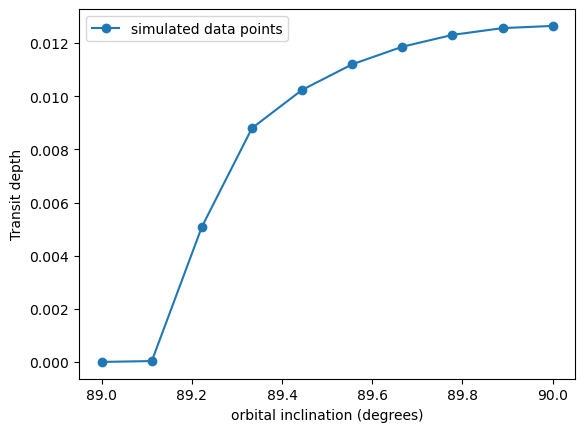

In [7]:
## now we plot the variation of transit depth with the variation of parameter

plt.plot(deg_array, TS_depth, 'o-', label='simulated data points')
plt.xlabel('orbital inclination (degrees)')
plt.ylabel('Transit depth')
plt.legend()
plt.show()

# **Varying the Mass of star (thereyby the radius of star) parameter**

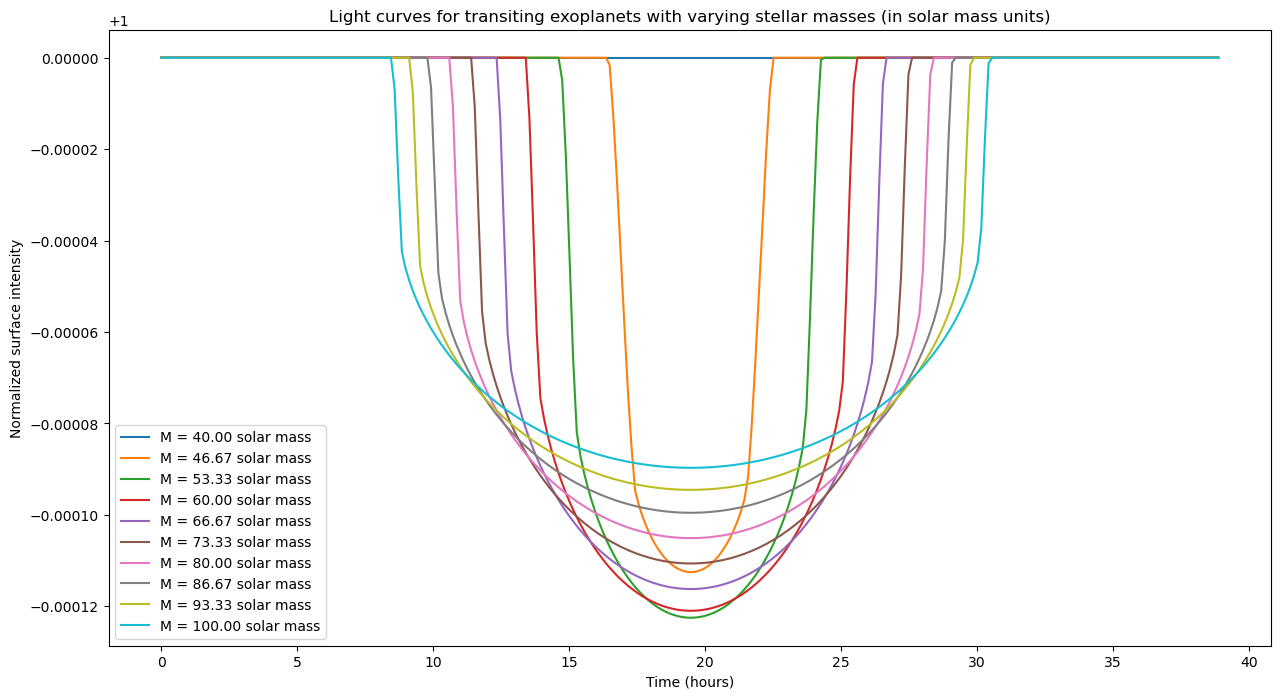

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

m_sun_array = np.linspace(40,100,10)
M_array = m_sun_array*M_sun

i = 89.4*math.pi/180

M_sun=1.9891*(10**30)
#M=45*M_sun  ## Mass of our star
R_sun=696340*1000
R_array = np.array([math.sqrt(M/M_sun)*R_sun for M in M_array])
R_earth=6371*1000
## sqrt(60)*R_sun is the maximum radius we are taking to consideration correspondiing to 750 pixels in radius

R_pixels=np.array([int(750*R/(math.sqrt(100)*R_sun)) for R in R_array])  ## Radius in pixels of our star

## Jupiter like planet

Rp = R_sun/10 # for this we fix it
Rp_pixels=int(750*Rp/(math.sqrt(100)*R_sun))
Mp= M_sun/1000

AU=1.496*(10**11)
d= 2.2*AU

i=89.2*math.pi/180
h=d*np.cos(i)
h_pixel=int(h*750/(math.sqrt(100)*R_sun))

G = 6.6743*(10**(-11))

T= math.sqrt(4*(math.pi**2)*(d**3)/(G*M))

v=math.sqrt(G*M/d)

dt=Rp_pixels*math.sqrt(100)*R_sun/(750*v)
d_pixel=int(d*750/(math.sqrt(100)*R_sun))

transit_time=((2048-2*Rp_pixels)/(math.pi*d_pixel))*(T/2)


x = np.arange(-1024, 1024, 1)
y = np.arange(-1024, 1024, 1)

[X, Y] = np.meshgrid(x, y)  # initializing a 2d mesh grid in which the transit simulation will take place
f=np.zeros((len(X),len(Y)))

u = 0.7  # limb darkening coeffecient
I_0 = 1000   # intensity of the background star
#R = np.linspace(0,500,100)
def limb_dark(r,R_p): # r is the height of a point on the 2d projected surface of the star from its centre
    I_r = I_0 * (1-(u*(1-np.sqrt((R_p**2 - r**2)/R_p**2))))
    return I_r
def star(R_p):
    for i in x: # defininng the star as a circle on the 2d plane and also using limb-darkening
        for j in y:
            if i**2+j**2 <= R_p**2:
               f[i+1024][j+1024] =  limb_dark(np.sqrt(i**2+j**2), R_p)
            else:
               f[i+1024][j+1024] = 0
    return f


X=1024*math.sqrt(100)*R_sun/750

from IPython.display import clear_output
def trans(h_pixel, Rp_pixels, transit_time, dt, f):
    c=[0,h_pixel]
    T=[]
    I=[]
    for t in np.arange(0,transit_time,dt):
        clear_output(wait=True)
        c=[int(v*t*750/(math.sqrt(100)*R_sun))+Rp_pixels,h_pixel]
        #if c[1]+1024+Rp_pixels>=2048 or c[0]+Rp_pixels>=2024:
        #    break
        g=f.copy()

        for i in range(-Rp_pixels,Rp_pixels):
            for j in range(-Rp_pixels,Rp_pixels):
                if i**2+j**2<=Rp_pixels**2:
                   g[c[0]+i][c[1]+1024+j]=0

        #plt.imshow(g.T, cmap ='gray', extent =[-X/1000, X/1000, -X/1000, X/1000], interpolation ='nearest', origin ='lower')
        #plt.xlabel("X (km)")
        #plt.ylabel("Y (km)")
        #plt.colorbar()
        I.append(np.sum(g))
        T.append(t)
        #plt.plot(T,I)
        #plt.pause(0.00000000001)

    return g,I,T

## now plotting
#lcs_I=[]
#lcs_T=[]
TS_depth = []
from matplotlib.pyplot import figure
figure(figsize=(15, 8))
for q in range(len(M_array)):
    f = star(R_pixels[q])
    g,I,T = trans(h_pixel, Rp_pixels, transit_time, dt, f)
    I=I/max(I)
    T=[i/(60*60) for i in T]
    ts = (max(I)-min(I))/max(I)
    TS_depth.append(ts)
    plt.xlabel("Time (hours)")
    plt.ylabel('Normalized surface intensity')
    plt.title('Light curves for transiting exoplanets with varying stellar masses (in solar mass units)')
    plt.plot(T,I,label='M = %.2f solar mass' %m_sun_array[q])
    plt.legend()

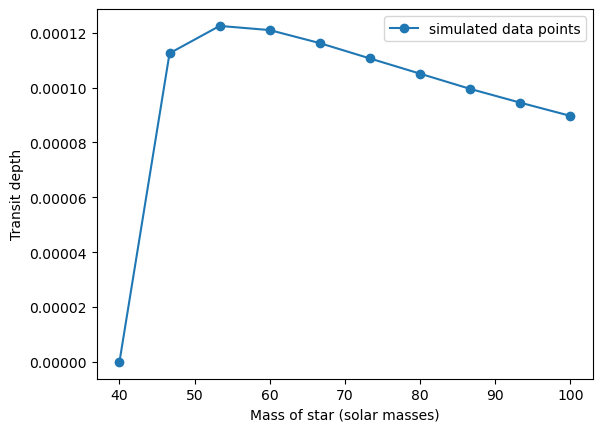

[ 40.          46.66666667  53.33333333  60.          66.66666667
  73.33333333  80.          86.66666667  93.33333333 100.        ] [0.0, 0.00011251698220493545, 0.0001224918719752166, 0.00012097255035548038, 0.00011621832288322143, 0.00011063068381966801, 0.0001050838756566641, 9.953498811066108e-05, 9.451858399667223e-05, 8.97006972064851e-05]


In [9]:
## now we plot the variation of transit depth with the variation of parameter

plt.plot(m_sun_array, TS_depth, 'o-', label='simulated data points')
plt.xlabel('Mass of star (solar masses)')
plt.ylabel('Transit depth')
plt.legend()
plt.show()
print(m_sun_array, TS_depth)

In [10]:
import numpy as np
import scipy.stats

x = np.array([53.33333333, 60, 66.66666667, 73.33333333, 80, 86.66666667, 93.33333333, 100])  # Removed leading zeros
y = np.array([0.0001224918719752166, 0.00012097255035548038, 0.00011621832288322143, 0.00011063068381966801, 0.0001050838756566641, 9.953498811066108e-05, 9.451858399667223e-05, 8.97006972064851e-05])

pearson_corr, _ = scipy.stats.pearsonr(x, y)  # Calculate Pearson's correlation coefficient (r)
print("Pearson's correlation coefficient (r):", pearson_corr)

spearman_corr = scipy.stats.spearmanr(x, y).correlation  # Calculate Spearman's rank correlation coefficient (rho)
print("Spearman's rank correlation coefficient (rho):", spearman_corr)



Pearson's correlation coefficient (r): -0.9954352130605384
Spearman's rank correlation coefficient (rho): -1.0


# **Varying the d (star to planet) parameter**

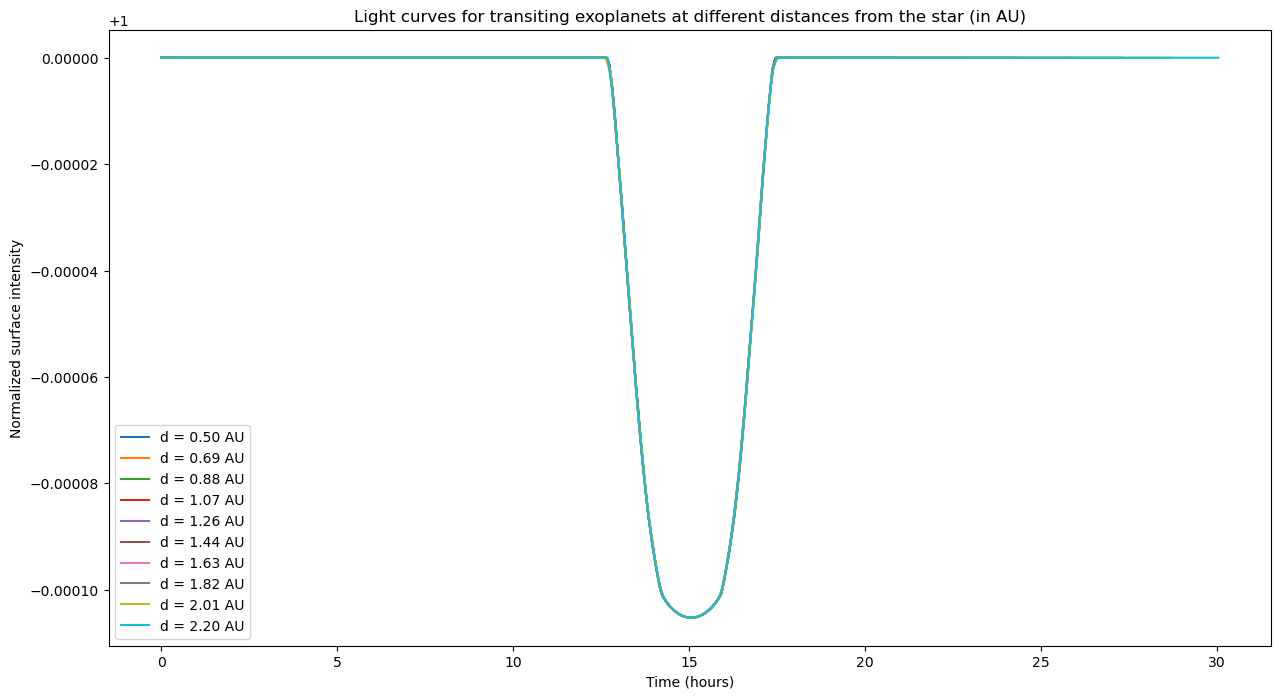

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt


d_scale=np.linspace(0.5,2.2,10)

i = 89.4*math.pi/180

M_sun=1.9891*(10**30)
M=45*M_sun  ## Mass of our star
R_sun=696340*1000
R=math.sqrt(M/M_sun)*R_sun
R_earth=6371*1000
## sqrt(60)*R_sun is the maximum radius we are taking to consideration correspondiing to 750 pixels in radius

R_pixels=int(750*R/(math.sqrt(60)*R_sun))  ## Radius in pixels of our star

## Jupiter like planet

Rp = R_sun/10 # for this we fix it
Rp_pixels=int(750*Rp/(math.sqrt(60)*R_sun))
Mp= M_sun/1000

AU=1.496*(10**11)
#d= 2.2*AU
D = d_scale*AU

i=89.2*math.pi/180
h=d*np.cos(i)
h_pixel=int(h*750/(math.sqrt(60)*R_sun))

G = 6.6743*(10**(-11))

T= np.array([math.sqrt(4*(math.pi**2)*(d**3)/(G*M)) for d in D])

V = np.array([math.sqrt(G*M/d) for d in D])

Dt=np.array([Rp_pixels*math.sqrt(60)*R_sun/(750*v) for v in V])
D_pixel=np.array([int(d*750/(math.sqrt(60)*R_sun)) for d in D])

Transit_time=np.array([((2048-2*Rp_pixels)/(math.pi*D_pixel[k]))*(T[k]/2) for k in range(len(D_pixel))])


x = np.arange(-1024, 1024, 1)
y = np.arange(-1024, 1024, 1)

[X, Y] = np.meshgrid(x, y)  # initializing a 2d mesh grid in which the transit simulation will take place
f=np.zeros((len(X),len(Y)))

u = 0.7  # limb darkening coeffecient
I_0 = 1000   # intensity of the background star
#R = np.linspace(0,500,100)
def limb_dark(r,R_p): # r is the height of a point on the 2d projected surface of the star from its centre
    I_r = I_0 * (1-(u*(1-np.sqrt((R_p**2 - r**2)/R_p**2))))
    return I_r
def star(R_p):
    for i in x: # defininng the star as a circle on the 2d plane and also using limb-darkening
        for j in y:
            if i**2+j**2 <= R_p**2:
               f[i+1024][j+1024] =  limb_dark(np.sqrt(i**2+j**2), R_p)
            else:
               f[i+1024][j+1024] = 0
    return f


X=1024*math.sqrt(60)*R_sun/750

from IPython.display import clear_output
def trans(h_pixel, Rp_pixels, transit_time, dt, f):
    c=[0,h_pixel]
    T=[]
    I=[]
    for t in np.arange(0,transit_time,dt):
        clear_output(wait=True)
        c=[int(v*t*750/(math.sqrt(60)*R_sun))+Rp_pixels,h_pixel]
        #if c[1]+1024+Rp_pixels>=2048 or c[0]+Rp_pixels>=2024:
        #    break
        g=f.copy()

        for i in range(-Rp_pixels,Rp_pixels):
            for j in range(-Rp_pixels,Rp_pixels):
                if i**2+j**2<=Rp_pixels**2:
                   g[c[0]+i][c[1]+1024+j]=0

        #plt.imshow(g.T, cmap ='gray', extent =[-X/1000, X/1000, -X/1000, X/1000], interpolation ='nearest', origin ='lower')
        #plt.xlabel("X (km)")
        #plt.ylabel("Y (km)")
        #plt.colorbar()
        I.append(np.sum(g))
        T.append(t)
        #plt.plot(T,I)
        #plt.pause(0.00000000001)

    return g,I,T

## now plotting
#lcs_I=[]
#lcs_T=[]
TS_depth = []
from matplotlib.pyplot import figure
f = star(R_pixels)
figure(figsize=(15, 8))
for q in range(len(d_scale)):
    g,I,T = trans(h_pixel, Rp_pixels, Transit_time[q], Dt[q], f)
    I=I/max(I)
    T=[i/(60*60) for i in T]
    ts = (max(I)-min(I))/max(I)
    TS_depth.append(ts)
    plt.xlabel("Time (hours)")
    plt.ylabel('Normalized surface intensity')
    plt.title('Light curves for transiting exoplanets at different distances from the star (in AU)')
    plt.plot(T,I,label='d = %.2f AU' %d_scale[q])
    plt.legend()

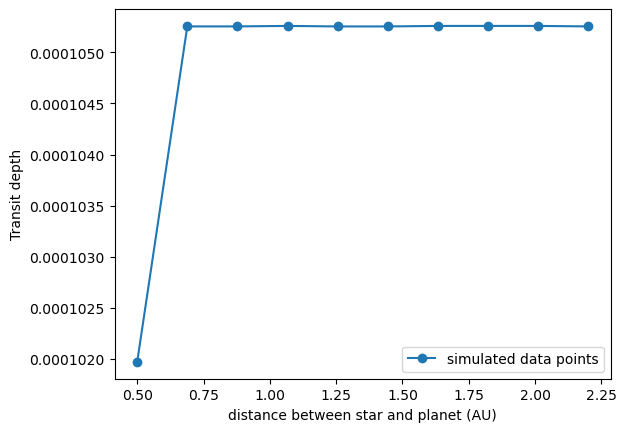

In [12]:
## now we plot the variation of transit depth with the variation of parameter

plt.plot(d_scale, TS_depth, 'o-', label='simulated data points')
plt.xlabel('distance between star and planet (AU)')
plt.ylabel('Transit depth')
plt.legend()
plt.show()

# **Varying the radius of planet (Rp) parameter**

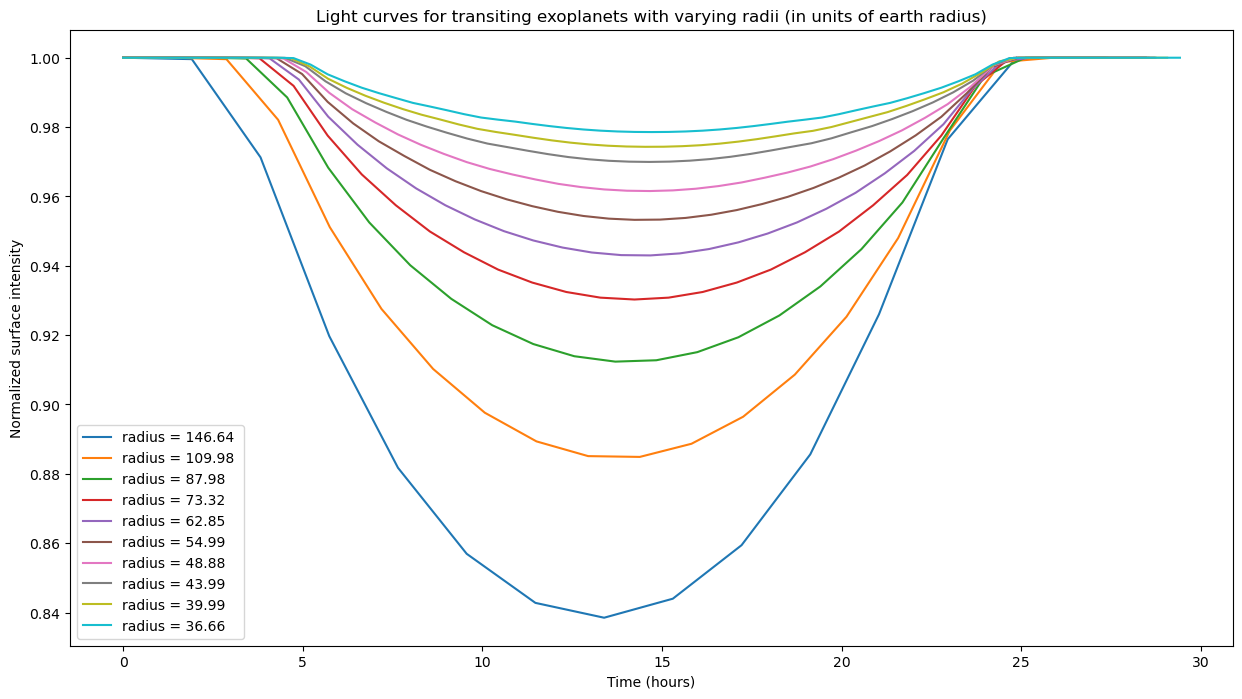

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt


Rp_scale = np.linspace(5,20,10) # will be for fixed R and there by fixed M

M_sun=1.9891*(10**30)
M=45*M_sun  ## Mass of our star
R_sun=696340*1000
R=math.sqrt(M/M_sun)*R_sun
R_earth=6371*1000
## sqrt(60)*R_sun is the maximum radius we are taking to consideration correspondiing to 750 pixels in radius

R_pixels=int(750*R/(math.sqrt(60)*R_sun))  ## Radius in pixels of our star

## Jupiter like planet

Rp = np.array([R/r for r in Rp_scale])
Rp_pixels = np.array([int(750*rp/(math.sqrt(60)*R_sun)) for rp in Rp])
Mp= M/1000

AU=1.496*(10**11)
d= 2.2*AU

i=89.2*math.pi/180
h=d*np.cos(i_array)
h_pixel=np.array([int(h*750/(math.sqrt(60)*R_sun)) for h in H])

G = 6.6743*(10**(-11))

T= math.sqrt(4*(math.pi**2)*(d**3)/(G*M))

v=math.sqrt(G*M/d)

Dt=np.array([rr*math.sqrt(60)*R_sun/(750*v) for rr in Rp_pixels])
d_pixel=int(d*750/(math.sqrt(60)*R_sun))

Transit_time = np.array([((2048-2*rr)/(math.pi*d_pixel))*(T/2) for rr in Rp_pixels])


x = np.arange(-1024, 1024, 1)
y = np.arange(-1024, 1024, 1)

[X, Y] = np.meshgrid(x, y)  # initializing a 2d mesh grid in which the transit simulation will take place
f=np.zeros((len(X),len(Y)))

u = 0.7  # limb darkening coeffecient
I_0 = 1000   # intensity of the background star
#R = np.linspace(0,500,100)
def limb_dark(r): # r is the height of a point on the 2d projected surface of the star from its centre
    I_r = I_0 * (1-(u*(1-np.sqrt((R_pixels**2 - r**2)/R_pixels**2))))
    return I_r
def star(R_pixels):
    for i in x: # defininng the star as a circle on the 2d plane and also using limb-darkening
        for j in y:
            if i**2+j**2 <= R_pixels**2:
               f[i+1024][j+1024] =  limb_dark(np.sqrt(i**2+j**2))
            else:
               f[i+1024][j+1024] = 0
    return f


X=1024*math.sqrt(60)*R_sun/750

from IPython.display import clear_output
def trans(h_pixel, Rp_pixels, transit_time, dt, f):
    c=[0,h_pixel]
    T=[]
    I=[]
    for t in np.arange(0,transit_time,dt):
        clear_output(wait=True)
        c=[int(v*t*750/(math.sqrt(60)*R_sun))+Rp_pixels,h_pixel]
        #if c[1]+1024+Rp_pixels>=2048 or c[0]+Rp_pixels>=2024:
        #    break
        g=f.copy()

        for i in range(-Rp_pixels,Rp_pixels):
            for j in range(-Rp_pixels,Rp_pixels):
                if i**2+j**2<=Rp_pixels**2:
                   g[c[0]+i][c[1]+1024+j]=0

        #plt.imshow(g.T, cmap ='gray', extent =[-X/1000, X/1000, -X/1000, X/1000], interpolation ='nearest', origin ='lower')
        #plt.xlabel("X (km)")
        #plt.ylabel("Y (km)")
        #plt.colorbar()
        I.append(np.sum(g))
        T.append(t)
        #plt.plot(T,I)
        #plt.pause(0.00000000001)

    return g,I,T

## now plotting
#lcs_I=[]
#lcs_T=[]
TS_depth = []
f = star(R_pixels)
from matplotlib.pyplot import figure
figure(figsize=(15, 8))
for q in range(len(i_array)):
    g,I,T = trans(h_pixel, Rp_pixels[q], Transit_time[q], Dt[q], f)
    I=I/max(I)
    T=[i/(60*60) for i in T]
    ts = (max(I)-min(I))/max(I)
    TS_depth.append(ts)
    rrr=Rp/R_earth
    plt.xlabel("Time (hours)")
    plt.ylabel('Normalized surface intensity')
    plt.title('Light curves for transiting exoplanets with varying radii (in units of earth radius)')
    plt.plot(T,I,label='radius = %.2f ' %rrr[q])
    plt.legend()

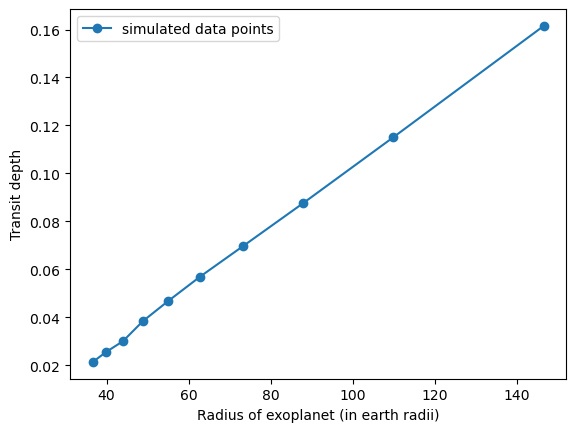

[146.63916893 109.9793767   87.98350136  73.31958447  62.84535811
  54.98968835  48.87972298  43.99175068  39.99250062  36.65979223] [0.16149205194795635, 0.11511771671736348, 0.08763937598163862, 0.06972782116832943, 0.05701079209188897, 0.04675067532693533, 0.03844601965622141, 0.030049481985084392, 0.0256919024102249, 0.021437297103634068]


In [14]:
## now we plot the variation of transit depth with the variation of parameter

plt.plot(rrr, TS_depth, 'o-', label='simulated data points')
plt.xlabel('Radius of exoplanet (in earth radii)')
plt.ylabel('Transit depth')
plt.legend()
plt.show()
print(rrr,TS_depth)

In [15]:
import numpy as np
import scipy.stats

x = np.array([53.33333333, 60, 66.66666667, 73.33333333, 80, 86.66666667, 93.33333333, 100])  # Removed leading zeros
y = np.array([0.0001224918719752166, 0.00012097255035548038, 0.00011621832288322143, 0.00011063068381966801, 0.0001050838756566641, 9.953498811066108e-05, 9.451858399667223e-05, 8.97006972064851e-05])

pearson_corr, _ = scipy.stats.pearsonr(rrr, TS_depth)  # Calculate Pearson's correlation coefficient (r)
print("Pearson's correlation coefficient (r):", pearson_corr)

spearman_corr = scipy.stats.spearmanr(rrr, TS_depth).correlation  # Calculate Spearman's rank correlation coefficient (rho)
print("Spearman's rank correlation coefficient (rho):", spearman_corr)

Pearson's correlation coefficient (r): 0.9997554659777794
Spearman's rank correlation coefficient (rho): 0.9999999999999999
